Geometric Brownian Motion
- https://m.blog.naver.com/PostView.nhn?blogId=gdpresent&logNo=220826875027&proxyReferer=https:%2F%2Fwww.google.com%2F
- https://sejinworld.tistory.com/38
- https://analysisbugs.tistory.com/13

In [3]:
import pandas as pd
import numpy as np
df_price = pd.read_csv('../data/kospi100_price_vol.csv' , skiprows=3 )

C:\miniconda3\envs\gb\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (49,50,79,80,149,150,265,266) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_price.head(3)

,Symbol Name_Item Name,삼성전자_수정주가(원),삼성전자_거래량(주),SK하이닉스_수정주가(원),SK하이닉스_거래량(주),LG화학_수정주가(원),LG화학_거래량(주),삼성바이오로직스_수정주가(원),삼성바이오로직스_거래량(주),셀트리온_수정주가(원),...,빙그레_수정주가(원),빙그레_거래량(주),락앤락_수정주가(원),락앤락_거래량(주),남선알미늄_수정주가(원),남선알미늄_거래량(주),한일현대시멘트_수정주가(원),한일현대시멘트_거래량(주),태영건설_수정주가(원),태영건설_거래량(주)
0,2010-06-30,"15,480","536,406","25,050","13,952,014","309,500","333,634",NaN,NaN,"19,092",...,"50,500","16,199","37,178","229,496",623,"142,257","26,078","33,933","2,370","39,670"
1,2010-07-01,"15,320","444,516","25,500","12,695,993","304,500","204,739",NaN,NaN,"19,046",...,"49,100","24,528","36,292","115,381",623,"81,480","26,120","21,138","2,425","153,114"
2,2010-07-02,"15,340","233,128","25,300","8,237,987","285,000","596,597",NaN,NaN,"19,046",...,"49,150","20,216","34,864","147,892",623,"295,414","26,290","20,494","2,390","40,323"


In [24]:
df_price = df_price.iloc[:,:2]
df_price.iloc[:,-1] = df_price.iloc[:,-1].str.replace(',','').astype(int)

In [25]:
df_price.head(3)

,Symbol Name_Item Name,삼성전자_수정주가(원)
0,2010-06-30,15480
1,2010-07-01,15320
2,2010-07-02,15340


---
## GBM모델 
$ \mathcal{d}S =  \mu S \mathcal{dt} + \sigma S \mathcal{dz}$
- 주가의 변화량 = 어떤값(주가의 기대 수익률 * 현재주가 * 주가의 변화량) + 랜덤    

dS : 주가에 대한 변화.     
$\mu$ : 주가의 기대 수익률    
$\sigma$ : 주가의 변동성     
z : 확률변수, 위너과정을 따른다.    

주가는 연속적이지 않다. 
$\Delta z = \epsilon \sqrt{\Delta t}$ , $\epsilon \sim N(0,1)$

**식을 풀어보기**
[1] S는 주가를 가져온다. 
[2] 변동성 : 1치를 변동성으로 사용하자. 

In [58]:
# delta S,t
lst_price = df_price.iloc[:,-1].values.astype(float)
S = lst_price[-1] 
delta_t = np.array(range(len(lst_price))).astype(float)
time_future = list(range(len(lst_price)))

In [52]:
# 변동성 
volatility = df_price.iloc[:,-1][::-1][::5][::-1].pct_change().std()
mu = 0.0056 #기대수익률
epsilon = np.random.randn(len(delta_t))

In [53]:
dS = mu*S*delta_t + volatility*S*epsilon*np.sqrt(delta_t)

In [55]:
price_future = dS + S

---
## Display

In [56]:
import seaborn as sns

<AxesSubplot:>

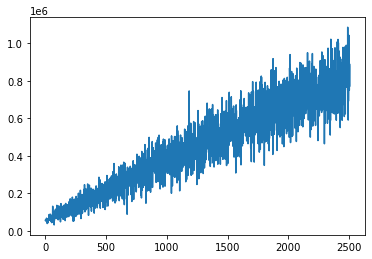

In [59]:
sns.lineplot(x = time_future , y = price_future)

---
---
# 정답

In [60]:
T = 1
Days = 300
deltaT = T/Days
z = 0

In [62]:
n_col = [x for x in range(500)]
n_row = [x for x in range(500)]
df = pd.DataFrame(columns = n_col , index = n_row)

In [63]:
np.random.seed(2000)

In [64]:
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
for x in range(1,301):
    deltaZ = np.random.normal(loc = 0 , scale = 1)*np.sqrt(deltaT)
    z = z + deltaZ
    df.loc[x,1] = z

In [67]:
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.109576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-0.0120585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-0.020656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0130071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in the prediction time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

In [73]:
df_only_pric = pd.DataFrame()
df_only_pric['pric'] = lst_price

In [81]:
# dt : 주식 가격의 인터벌 (일로 환산. 12시간이면 0.5가 된다. )
dt = 1

# T : 사용하는 데이터의 유닛수(일수) 아니면 몇칠을 예측할건지 
T = len(lst_price)

# 예측되어 나오는 데이터 포인트.
N = T / dt

# 타임 ticker
t = np.arange(1, int(N) + 1)

# mu : 우리가 사용하는 과거 주가 데이터의 평균적인 리턴
lst_return = (df_only_pric[1:] - df_only_pric.shift(1)[1:])/df_only_pric[1:] 
mu = np.mean(lst_return)

# sigma : 변동성 
sigma = np.std(lst_return)

# b:시뮬레이션 할 수 , 즉 랜덤변수의 숫자의 수
scen_size = 2
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}

In [82]:
b

{'1': array([ 0.25709733, -0.73978941, -0.64639225, ..., -0.56104255,
         1.35898284,  0.45253561]),
 '2': array([-2.22050149,  0.54584908, -0.44257936, ...,  0.03079913,
         0.581392  , -0.55927746])}

In [76]:
mu

,pric
1,-160.0
2,20.0
3,0.0
4,160.0
5,-120.0
...,...
2503,500.0
2504,200.0
2505,300.0
2506,0.0
